In [ ]:
Name : Omkar Hulawale
Roll_no : 14153
Batch : A3

In [123]:
import pandas as pd

In [124]:
df=pd.read_csv("emails.csv")

In [125]:
df.shape

(5172, 3002)

In [126]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [127]:
x=df.drop(['Email No.','Prediction'],axis=1)
y=df['Prediction']

In [128]:
x.shape

(5172, 3000)

In [129]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3000 entries, the to dry
dtypes: int64(3000)
memory usage: 118.4 MB


In [130]:
x.dtypes

the               int64
to                int64
ect               int64
and               int64
for               int64
                  ...  
infrastructure    int64
military          int64
allowing          int64
ff                int64
dry               int64
Length: 3000, dtype: object

In [131]:
set(x.dtypes)

{dtype('int64')}

<Axes: xlabel='Prediction', ylabel='count'>

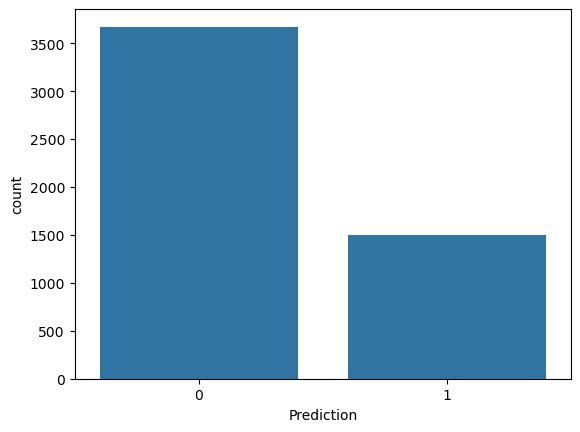

In [132]:
import seaborn as sns
sns.countplot(x=y)

In [133]:
y.value_counts()

Prediction
0    3672
1    1500
Name: count, dtype: int64

In [134]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [135]:
x_scaled

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.03809524, 0.09848485, 0.06705539, ..., 0.        , 0.00877193,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00952381, 0.0530303 , 0.        , ..., 0.        , 0.00877193,
        0.        ],
       [0.1047619 , 0.18181818, 0.01166181, ..., 0.        , 0.        ,
        0.        ]])

In [136]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


In [137]:
x_scaled.shape

(5172, 3000)

In [138]:
x_train.shape

(3620, 3000)

In [139]:
x_test.shape

(1552, 3000)

In [140]:
from sklearn.neighbors import KNeighborsClassifier
knn =  KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [141]:
y_pred=knn.predict(x_test)

In [142]:
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score,classification_report

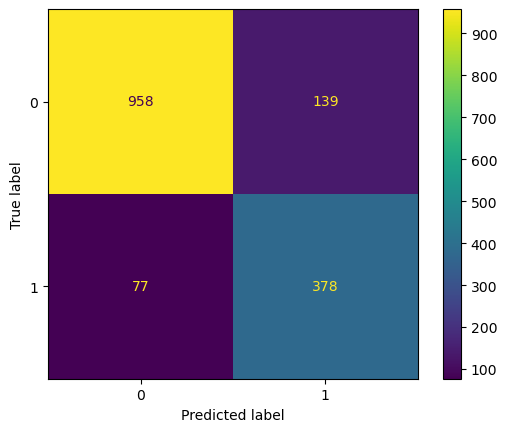

In [143]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [144]:
y_test.value_counts()

Prediction
0    1097
1     455
Name: count, dtype: int64

In [145]:
accuracy_score(y_test,y_pred)

0.8608247422680413

In [146]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90      1097
           1       0.73      0.83      0.78       455

    accuracy                           0.86      1552
   macro avg       0.83      0.85      0.84      1552
weighted avg       0.87      0.86      0.86      1552



In [147]:
import numpy as np
import matplotlib.pyplot as plt

In [148]:
error=[]
for k in range(1,41):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    error.append(np.mean(y_pred!=y_test))

In [149]:
error

[0.148840206185567,
 0.13402061855670103,
 0.13788659793814434,
 0.13079896907216496,
 0.13917525773195877,
 0.13144329896907217,
 0.13595360824742267,
 0.13402061855670103,
 0.12371134020618557,
 0.12628865979381443,
 0.13015463917525774,
 0.13144329896907217,
 0.13530927835051546,
 0.13530927835051546,
 0.14239690721649484,
 0.14239690721649484,
 0.14626288659793815,
 0.14368556701030927,
 0.1411082474226804,
 0.14690721649484537,
 0.13917525773195877,
 0.14497422680412372,
 0.14432989690721648,
 0.14690721649484537,
 0.14497422680412372,
 0.148840206185567,
 0.14690721649484537,
 0.148840206185567,
 0.15012886597938144,
 0.15012886597938144,
 0.15077319587628865,
 0.15012886597938144,
 0.148840206185567,
 0.15141752577319587,
 0.15335051546391754,
 0.15077319587628865,
 0.15335051546391754,
 0.15528350515463918,
 0.15721649484536082,
 0.15721649484536082]

In [150]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [177]:
y_pred=knn.predict(x_test)

In [178]:
accuracy_score(y_test,y_pred)

0.851159793814433

In [188]:
from sklearn.svm import SVC
svm = SVC(kernel='linear')
svm.fit(x_train,y_train)

SVC(kernel='linear')

In [190]:
y_pred=svm.predict(x_test)

In [192]:
accuracy_score(y_test,y_pred)

0.9568298969072165